In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os

In [25]:
train_dir = r"D:\Coding Workspaces\CNN_Scratch_Project_2\Datasets\train"
test_dir = r"D:\Coding Workspaces\CNN_Scratch_Project_2\Datasets\test"
valid_dir = r"D:\Coding Workspaces\CNN_Scratch_Project_2\Datasets\val"

In [3]:
CATEGORIES = ["NORMAL","PNEUMONIA"]




```python
for i in CATEGORIES:
    path = os.path.join(train_dir, i)
```
- **`CATEGORIES`**: A list of folder names, each representing a class (e.g., `['Normal', 'Pneumonia']`).
- **`train_dir`**: The root directory containing subfolders for each class.
- **`path`**: Constructs the full path to one category folder.

---

```python
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
```
- **`os.listdir(path)`**: Lists all image filenames in that category folder.
- **`cv2.imread(..., cv2.IMREAD_GRAYSCALE)`**: Loads the image in grayscale mode — perfect for X-rays, which are inherently monochromatic and benefit from reduced dimensionality.

---

```python
plt.imshow(img_array, cmap='gray')
plt.show()
```
- **`imshow(..., cmap='gray')`**: Displays the image using a grayscale colormap.
- **`show()`**: Renders the image in a pop-up or inline plot (depending on your environment).

---

```python
break
```
- The inner `break` shows **only the first image** from the first category.
- The outer `break` ensures you don’t loop through all CATEGORIES — just the first one.

---

### 🩻 Why This Is Useful for X-rays

- **Grayscale conversion** simplifies preprocessing and reduces computational load.
- **Visual inspection** helps catch corrupted files, unexpected formats, or misclassified samples early.
- Especially in medical imaging, this step is crucial before feeding data into a CNN — you want to be sure the pixel intensity patterns are consistent and meaningful.

---




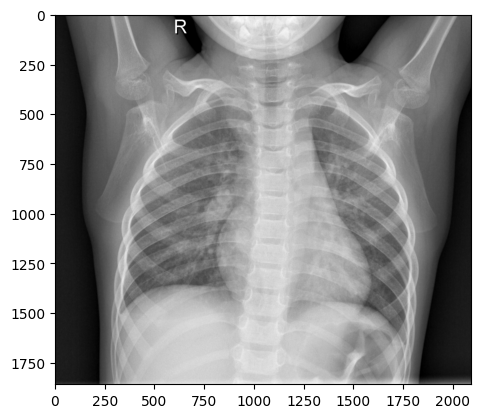

In [4]:
for i in CATEGORIES:
    path=os.path.join(train_dir,i) ##inside the directory trying to get inside one more folder based on CATEGORIES dir/Normal/.... like this where Normal is a category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray') ## converting image to grayscale image
        plt.show()
        break 
    break


In [5]:
for i in CATEGORIES:
    path = os.path.join(train_dir, i)
    print(i, len(os.listdir(path)))

NORMAL 1341
PNEUMONIA 3885


In [6]:
# intitalize the size of image 
img_size = 100

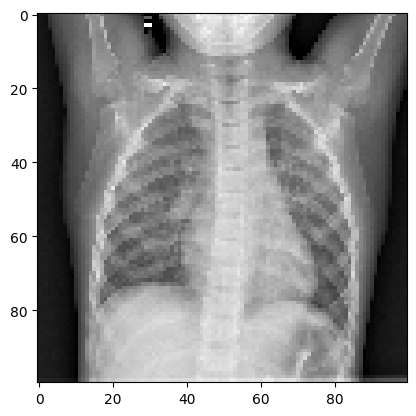

In [7]:
new_array = cv2.resize(img_array,(img_size,img_size)) ## resizing the image 100x100
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
training_data = []

In [9]:
## defining the function for training data according to the CATEGORIES converting the images into grayscale
# ocnverting it into numpy arrays

def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(train_dir,i)
        class_num = CATEGORIES.index(i) ## Labeling the data 0 and 1
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size)) ## resizing the image
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
# - new_array is the resized grayscale image (e.g., shape (100, 100)).
# - class_num is the label just assigned.
# - Together, [new_array, class_num] forms a data-label pair.
            

In [10]:
create_training_data()

In [11]:
## Shuffling the random data
import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[46, 49, 50, ..., 60, 80, 51],
       [51, 56, 66, ..., 73, 63, 51],
       [69, 68, 74, ..., 63, 73, 99],
       ...,
       [15, 15, 18, ...,  6, 13, 42],
       [15, 17, 16, ...,  6, 17, 39],
       [20, 20, 16, ...,  6, 18, 30]], dtype=uint8), 1]
[array([[ 30,  31,  34, ...,   1,   2,   2],
       [ 38,  39,  35, ...,   0,   0,   0],
       [ 36,  41,  40, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0, 108, 163],
       [  2,   0,   0, ...,   3,  88, 153],
       [  2,   0,   0, ...,   5,  86, 141]], dtype=uint8), 1]
[array([[ 18,  20,  12, ...,  63, 106, 135],
       [ 17,  17,  11, ...,  68, 117, 146],
       [ 15,  17,   8, ...,  74, 120, 149],
       ...,
       [ 23,  21,  20, ...,   1,   8,  25],
       [ 21,  19,  18, ...,   0,   7,  25],
       [ 21,  17,  22, ...,   0,   7,  23]], dtype=uint8), 1]
[array([[ 82, 102, 116, ...,  53,  48,  35],
       [ 95, 110, 122, ...,  84,  70,  35],
       [109, 118, 125, ...,  88,  74,  49],
       ...,
      

In [12]:
X=[]
y=[]

In [13]:
for features,label in training_data:
    X.append(features) # so features in here means independent variables
    y.append(label) # and label is the dependent variables

In [14]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[46]
   [49]
   [50]
   ...
   [60]
   [80]
   [51]]

  [[51]
   [56]
   [66]
   ...
   [73]
   [63]
   [51]]

  [[69]
   [68]
   [74]
   ...
   [63]
   [73]
   [99]]

  ...

  [[15]
   [15]
   [18]
   ...
   [ 6]
   [13]
   [42]]

  [[15]
   [17]
   [16]
   ...
   [ 6]
   [17]
   [39]]

  [[20]
   [20]
   [16]
   ...
   [ 6]
   [18]
   [30]]]]


In [15]:
y = np.array(y)

In [16]:
# reshaping the features for making it compatible with tensorflow making it 3d data
X=np.array(X).reshape(-1,img_size,img_size,1)

- -1: Automatically infers the batch size (i.e., number of images)
- img_size: Height and width of each image (e.g., 100×100)
- 1: Number of channels — and this is the key part because grayscale image


In [17]:
validation_data = []

In [18]:
# as we are going to do the same for validation data
## defining the function for training data according to the CATEGORIES converting the images into grayscale
# ocnverting it into numpy arrays

def create_validating_data():
    for i in CATEGORIES:
        path = os.path.join(valid_dir,i)
        class_num = CATEGORIES.index(i) ## Labeling the data 0 and 1
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size)) ## resizing the image
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass
# - new_array is the resized grayscale image (e.g., shape (100, 100)).
# - class_num is the label just assigned.
# - Together, [new_array, class_num] forms a data-label pair.
            

In [19]:
create_validating_data()


In [20]:
print(len(validation_data))

16


In [21]:
print(len(training_data))

5226


In [22]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], dtype=uint8), 0]
[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[  0,   8,  24, ...,  65,  61, 103],
       [  0,   3,  23, ...,  67,  59, 121],
       [  1,   0,  18, ...,  61,  58, 123],
       ...,
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2]], dtype=uint8), 1]
[array([[ 0,  5, 16, ..., 79, 47, 29],
       [ 0,  3, 15, ..., 78, 47, 27],
       [ 0,  3, 16, ..., 77, 52, 25],
       ...,
       [ 1,  1,  0, ...,

In [23]:
X_val=[]
y_val=[]

In [24]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [25]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [26]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [27]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
X_val = X_val/255.0

In [28]:
X.shape

(5226, 100, 100, 1)

In [29]:
X_val.shape

(16, 100, 100, 1)

In [48]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
y = np.array(y)  # ensure it's a NumPy array, not a Tensor
# Compute weights for each class
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)

# Convert to dictionary format {class_index: weight}
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 1.948545861297539, 1: 0.6725868725868726}


In [49]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=16,epochs=10,validation_data=(X_val, y_val),class_weight=class_weights)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.6798 - loss: 0.5651 - val_accuracy: 0.8125 - val_loss: 0.3608
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9370 - loss: 0.1606 - val_accuracy: 0.8750 - val_loss: 0.2283
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9510 - loss: 0.1301 - val_accuracy: 0.8750 - val_loss: 0.2442
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9543 - loss: 0.1282 - val_accuracy: 0.9375 - val_loss: 0.1729
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9651 - loss: 0.0993 - val_accuracy: 0.6875 - val_loss: 0.6890
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9661 - loss: 0.0973 - val_accuracy: 1.0000 - val_loss: 0.0923
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9572 - loss: 0.1309 - val_accuracy: 0.9375 - val_loss: 0.1201
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9689 - loss: 0.0809 - 

In [34]:
# saving the model
model.save("model_1.h5")

In [9]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [10]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [11]:
image = r"C:\Users\shrey\Downloads\drive-download-20250821T180156Z-1-001\X Ray Dataset\chest_xray-20250726T110654Z-1-001\chest_xray\test\NORMAL\IM-0059-0001.jpeg"

In [12]:
del model 


NameError: name 'model' is not defined

In [73]:
tf.keras.backend.clear_session()

In [13]:
model = tf.keras.models.load_model("./model_1.h5")

In [14]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[[0.00016746]]
0
NORMAL


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


In [15]:
image2 = r"D:\Coding Workspaces\CNN_Scratch_Project_2\Datasets\test\PNEUMONIA\person1_virus_6.jpeg"

In [16]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.9999995]]
1
PNEUMONIA


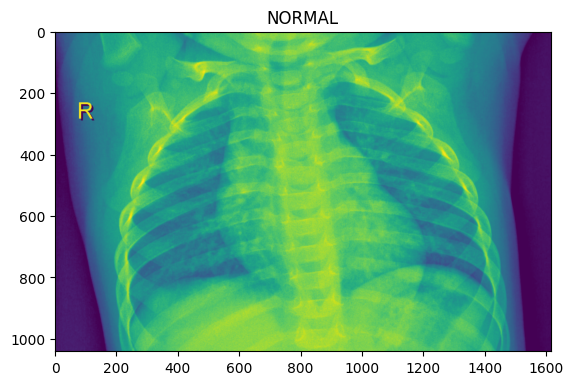

In [17]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [23]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = test_dir

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('./model_1.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


20/20 - 1s - 58ms/step - accuracy: 0.7853 - loss: 1.1969
Test accuracy: 0.7852563858032227


## Pre Trained Model

In [35]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


In [42]:
# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [43]:

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
model.summary()

Model: "functional_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,378,053 (70.11 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,442,244 (9.32 MB)

In [ ]:
# define the image generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [45]:
# create the image generators for training and validation data
train_dir = r"D:\Coding Workspaces\CNN_Scratch_Project_2\Datasets\train"
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(valid_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [46]:
model.fit(train_generator, epochs=10, validation_data=val_generator)


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 349ms/step - accuracy: 0.8724 - loss: 0.3043 - val_accuracy: 0.7500 - val_loss: 0.4087
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 57s 345ms/step - accuracy: 0.9482 - loss: 0.1440 - val_accuracy: 0.7500 - val_loss: 0.3504
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 57s 346ms/step - accuracy: 0.9443 - loss: 0.1462 - val_accuracy: 0.7500 - val_loss: 0.4318
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 355ms/step - accuracy: 0.9491 - loss: 0.1315 - val_accuracy: 0.9375 - val_loss: 0.1721
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 354ms/step - accuracy: 0.9565 - loss: 0.1184 - val_accuracy: 0.7500 - val_loss: 0.3397
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 60s 363ms/step - accuracy: 0.9525 - loss: 0.1222 - val_accuracy: 0.8750 - val_loss: 0.2274
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 59s 357ms/step - accuracy: 0.9541 - loss: 0.1165 - val_accuracy: 0.9375 - val_loss: 0.1858
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.9644 - loss: 0

In [48]:
# evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.8316 - loss: 0.6036
Test accuracy: 0.8910256624221802


In [49]:
model.save("model_pretrained.h5")

In [50]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.


d:\Coding Workspaces\Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.8316 - loss: 0.6036
Test accuracy: 0.8910256624221802
